In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,Dense,Input,SimpleRNN
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
max_features=10000 ## vocabulary size
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
## inspecting sample review and labels
sample_review,label=X_train[0],y_train[0]
print(sample_review)
print(label)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
## mapping of word index back to words (for understanding)

word_index=imdb.get_word_index()

In [6]:
len(word_index)
reverse_word_index={value:key for key,value in word_index.items()}

In [7]:
decoded_review=' '.join([reverse_word_index.get(i-3,'?')for i in sample_review])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
from tensorflow.keras.preprocessing import sequence

In [10]:
max_len=500
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
x_test=sequence.pad_sequences(X_test,maxlen=max_len)

In [11]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [12]:
## train simple rnn

## training simple rnn

In [13]:
from tensorflow.keras.layers import Input,Dense,LSTM,SimpleRNN

In [14]:
input_layer=Input(shape=(max_len,))

embedding_layer=Embedding(input_dim=max_features,output_dim=128)(input_layer)

rnn_layer=SimpleRNN(128,activation="relu")(embedding_layer)

output_layer=Dense(1,activation="sigmoid")(rnn_layer)


In [15]:
model=Model(inputs=input_layer,outputs=output_layer)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
# creating a instance of early stopping call back
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [20]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=early_stopping)

Epoch 1/10
625/625 [==============================] - 241s 382ms/step - loss: 327113.5625 - accuracy: 0.5591 - val_loss: 0.6290 - val_accuracy: 0.6092
Epoch 2/10
625/625 [==============================] - 238s 381ms/step - loss: 0.5616 - accuracy: 0.7028 - val_loss: 0.5723 - val_accuracy: 0.6828
Epoch 3/10
625/625 [==============================] - 236s 377ms/step - loss: 10.8049 - accuracy: 0.7921 - val_loss: 0.5521 - val_accuracy: 0.6944
Epoch 4/10
625/625 [==============================] - 237s 379ms/step - loss: 0.4260 - accuracy: 0.8328 - val_loss: 0.5274 - val_accuracy: 0.7338
Epoch 5/10
625/625 [==============================] - 241s 386ms/step - loss: 0.3803 - accuracy: 0.8712 - val_loss: 0.5194 - val_accuracy: 0.7430
Epoch 6/10
625/625 [==============================] - 234s 374ms/step - loss: 0.3452 - accuracy: 0.8871 - val_loss: 0.5179 - val_accuracy: 0.7486
Epoch 7/10
625/625 [==============================] - 237s 379ms/step - loss: 0.3155 - accuracy: 0.8989 - val_loss: 0.

In [21]:
model.save("imdb.h5")

In [22]:
import matplotlib.pyplot as plt

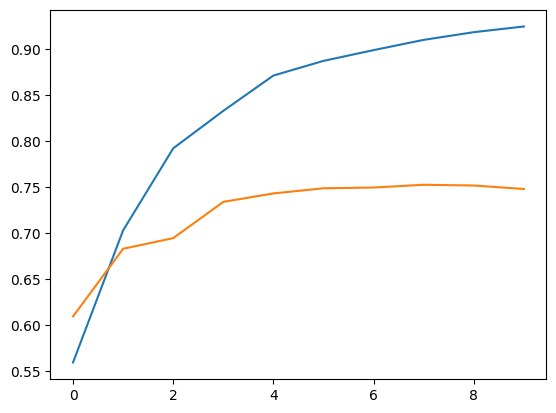

In [23]:
plt.plot(history.history["accuracy"],label="train_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")

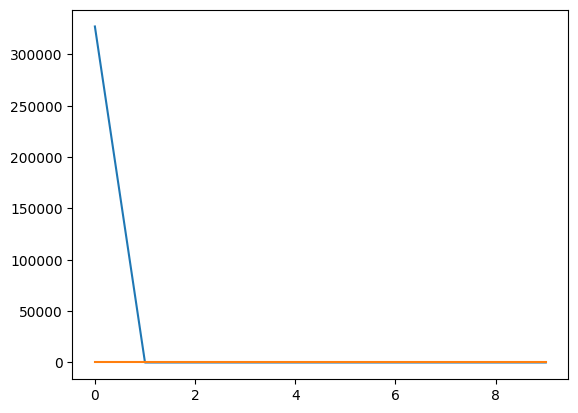

In [24]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")